# Five Personality Traits (OCEAN)
- Openness to experience (inventive/curious 
vs. consistent/cautious)

- Conscientiousness (efficient/organized vs. easy-going/careless)

- Extroversion (outgoing/energetic vs. solitary/reserved)

- Agreeableness (friendly/compassionate vs. challenging/detached)

- Neuroticism (sensitive/nervous vs. secure/confident)

In Portuguese
- Abertura à experiência (inventivo/curioso vs. consistente/cauteloso)

- Conscienciosidade (eficiente/organizado vs. descontraído/descuidado)

- Extroversão (extrovertida/energética vs. solitária/reservada)

- Amabilidade (amigável/compassivo vs. desafiador/desapegado)

- Neuroticismo (sensível/nervoso vs. seguro/confiante)

Link data base: https://www.kaggle.com/tunguz/big-five-personality-test

Importando as bibliotecas

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

**Loading the Dataset**

**Carregando o Dataset**

In [2]:
data = pd.read_csv('data-final.csv', sep='\t')

**Checking the dataset to verify the need for data cleaning**

**Verificando o dataset para verificar a necessidade de limpeza dos dados**

In [3]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


**Deleting irrelevant attributes for analysis**

**Excluindo os atributos irrelevantes para a analise**

In [5]:
data.drop(data.columns[50:110], axis=1, inplace=True)

In [6]:
#data.drop(data.columns[50:], axis=1, inplace=True)

**Rechecking the data to assess data cleanliness**

**Verificando novamente os dados afim de avaliar a limpeza dos dados**

In [7]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [8]:
data ["EXT1"].value_counts()

3.0    288622
1.0    249711
2.0    199165
4.0    191638
5.0     80702
0.0      3720
Name: EXT1, dtype: int64

**Analyzing database statistics.**

**Analisando estatísticas da base de dados.**

In [9]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


**Checking record count by value.**

**Verificando a contagem de registros por valor.**

In [10]:
data["EXT1"].value_counts()

3.00    288622
1.00    249711
2.00    199165
4.00    191638
5.00     80702
0.00      3720
Name: EXT1, dtype: int64

**Selecting the total number of records with the value zero.**

**Selecionando o total de registros com o valor zero.**

In [11]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**Clearing Dataframe with only records greater than zero.**

**Limpando o Dataframe com apenas registros maiores que zero.**

In [12]:
data = data[(data > 0.00).all(axis=1)]

**Checking record count by value**

**Verificando a contagem de registros por valor**

In [14]:
data["EXT1"].value_counts()

3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: EXT1, dtype: int64

**How many clusters are we going to define?**

**Qual o número de clusters que vamos definir?**

**Installing yellowbrick**

**Instalando a yellowbrick**

In [15]:
!pip install yellowbrick

**Importing the libraries that will be used**


**Importando as bibliotecas que serão utilizadas**

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

**Instantiating the KMeans method and Visualizer.**

**Instanciando o método KMeans e o Visualizer.**

In [17]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

**Selecting a random sample of data with 5000 observations.**

**Selecionando uma amostra aleatória dos dados com 5000 observações.**

In [18]:
data_sample = data.sample(n=5000, random_state=1)

**Running the test.**

**Executando o teste.**

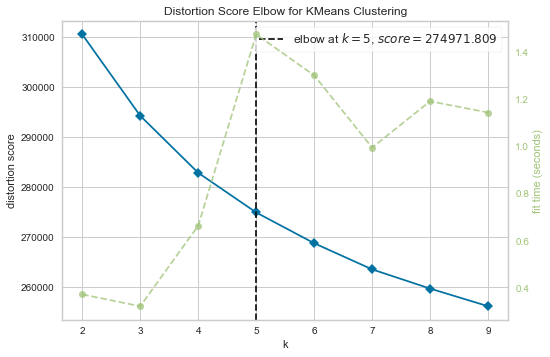

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
visualizer.fit(data_sample)
visualizer.poof()

**Grouping participants into 5 groups**
Assigning records to the appropriate groups


**Agrupando os participantes em 5 grupos**
Atribuindo os registros aos devidos grupos

In [20]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

**Inserting cluster labels into the dataframe**

**Inserindo os rótulos dos clusters no dataframe**

In [21]:
predicoes = k_fit.labels_
data['Clusters'] = predicoes

**Checking if the Clusters attribute is included**

**rificando se o atributo Clusters doi incluido**

In [22]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,4
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,2
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,2
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,4


# **Analyzing the groups**
How many observations are in each group?

# **Analisando os grupos**
Qual a quantidade de observações em cada grupo?

In [23]:
data["Clusters"].value_counts()

1    193137
4    182760
2    181029
0    169881
3    147627
Name: Clusters, dtype: int64

**Grouping records by groups**

**Agrupando os registros por grupos**

In [24]:
data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.81,3.63,2.24,4.06,2.30,3.18,1.75,4.08,2.18,4.49,4.29,2.46,4.52,2.13,3.57,3.90,4.01,3.78,4.01,3.96,2.46,3.38,2.59,3.85,2.56,3.87,2.71,3.44,3.68,3.06,2.81,3.39,3.81,3.51,2.07,3.52,3.56,3.06,2.76,3.31,3.52,2.38,4.08,2.12,3.43,2.09,3.69,3.19,4.29,3.73
1,3.46,1.91,3.81,2.49,4.07,1.81,3.67,2.75,3.79,2.99,3.81,2.96,4.24,2.42,3.27,3.47,3.80,3.45,3.64,3.17,2.14,4.30,2.66,4.19,2.00,4.01,1.85,3.91,4.13,3.86,2.98,3.63,3.85,3.25,2.22,3.53,3.46,2.83,2.94,3.49,3.78,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.21,4.21
2,2.14,3.27,3.11,3.65,3.00,2.69,2.23,3.99,2.33,4.12,3.58,3.05,4.19,2.60,2.86,2.86,2.92,2.48,3.02,2.74,1.85,3.98,1.68,4.38,1.96,4.19,1.99,4.01,4.20,3.73,3.85,2.22,4.30,2.03,3.25,2.06,4.18,2.02,3.85,3.90,3.56,2.17,3.88,2.08,3.71,2.00,4.00,2.96,4.26,3.78
3,2.15,3.45,2.81,3.59,2.61,2.87,2.12,3.72,2.69,3.99,2.43,3.73,3.13,3.00,2.39,2.09,2.39,1.99,2.69,2.37,3.07,3.01,2.65,2.89,3.25,2.77,3.12,2.97,2.71,3.08,3.29,2.91,3.83,2.47,2.44,2.81,3.55,2.58,2.89,3.52,3.73,1.96,3.79,2.05,3.79,2.05,4.09,3.31,3.92,3.84
4,3.46,1.96,4.33,2.24,4.27,1.68,3.87,2.82,3.74,2.53,2.32,3.85,3.14,3.32,2.11,1.90,2.10,1.67,2.11,1.71,1.89,4.44,1.84,4.25,1.87,3.86,1.60,4.10,4.09,4.20,3.75,2.58,4.20,1.90,3.14,2.27,3.88,1.94,3.59,3.89,3.91,1.75,4.09,1.79,4.16,1.66,4.33,3.25,4.11,4.29


**Averaging each group of questions to check for a pattern.
Selecting the columns of each group.**


**Calculando a média de cada grupo de questões para verificar um padrão.
Selecionando as colunas de cada grupo.**

In [25]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

**Adding the values of each group**

**Somando os valores de cada grupo**

In [26]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

**Displaying the average value per group**

**Exibindo o valor médio por grupo**

In [27]:
data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.97,3.66,3.16,3.18,3.25
1,3.07,3.42,3.31,3.22,3.37
2,3.05,3.03,3.20,3.17,3.24
3,3.00,2.62,2.95,3.03,3.25
4,3.09,2.42,3.21,3.11,3.34


**Viewing the averages by group.**

**Visualizando as médias por grupo.**

In [28]:
data_clusters = data_soma.groupby('clusters').mean()

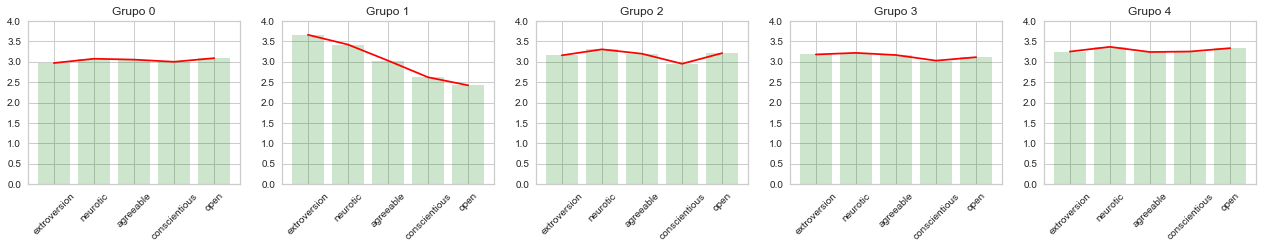

In [29]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

**Building an interface for viewing the user's questions and answers
Installing the Gradio library**

**Construindo interface para visualização das perguntas e respostas do usuario
Instalando a biblioteca gradio**

In [37]:
!pip install gradio

  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=3f516e74b672311471b1d80aa0bd80ba2f65400ed0c0a5d1d26b506714e0ed74
  Stored in directory: c:\users\user01\appdata\local\pip\cache\wheels\91\e2\96\f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=265592621fef1f799078979688a971e58e0cb381c8cb19fb5a8190d43d1dcfd0
  Stored in directory: c:\users\user01\appdata\local\pip\cache\wheels\fe\04\d1\a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart


In [38]:
import gradio as gr

**Reading the data with the questions.**

**Lendo os dados com as questões.**

In [39]:
dicio_questions = open("CodeBook.txt").read().split("\n")

**Checking the data.**

**Verificando os dados.**

In [40]:
dicio_questions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


**Wiping the data and recovering only the issues**

**Limpando os dados e recuperando apenas as questões**

In [49]:
questions = []
for q in dicio_questions:
  q = str(q)
  questions.append(q[q.find("\t"):].lstrip())

In [50]:
questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

**Creating dynamic inputs to pass to the grid**

**Criando os inputs dinamicos para passar ao gradio**

In [51]:
inputs_questions = []
for q in questions:
  obj_input = gr.components.Slider(minimum=1,maximum=5,step=1,label=q)
  inputs_questions.append(obj_input)

**Creating an interface and a predictor function.**

**Criando a interface e a função predict.**

In [54]:
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    return k_fit.predict(outputs_questions)

iface = gr.Interface(
                    fn = predict,
                    title = "Big Five Personality \n \n Cinco Grandes Personalidades",
                    description = "System for detecting personality traits.\n \nSistema para detecção de traços de personalidade.",
                    inputs = inputs_questions,
                    outputs="text")
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861/
Running on public URL: https://35706.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x203f88f54c0>,
 'http://127.0.0.1:7861/',
 'https://35706.gradio.app')